In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import sys
from pathlib import Path
print(Path.cwd())

/Users/vaishnukanna/Documents/jegadeesh-titman-momentum/results


In [3]:
PROJECT_ROOT = Path.cwd().parent
sys.path.append(str(PROJECT_ROOT))

In [4]:
from src.risk_metrics import cumulative_returns, max_drawdown, sharpe_ratio, drawdown_series, skewness, annualized_volatility, volatility_scaled_returns
from src.config import DATA_DIR

In [5]:
path1 = DATA_DIR / "portfolio" / "J6_K6_skip0_returns.csv"
if not path1.exists():
        raise FileNotFoundError(f"Portfolio data not found at {path1}. Run portfolio.py first.")
else:
    portfolio = pd.read_csv(
        path1, 
        parse_dates=["Date"]
        ).set_index("Date")
    print(portfolio.head())
    momentum_returns = portfolio['spread']

              winner     loser    spread
Date                                    
2001-02-01  0.019540 -0.192802  0.212342
2001-03-01 -0.043318 -0.035796 -0.007522
2001-04-01  0.077074  0.216275 -0.139201
2001-05-01  0.038592 -0.010052  0.048643
2001-06-01  0.033504  0.051841 -0.018337


In [6]:
scaled_momentum_portfolio = volatility_scaled_returns(momentum_returns, target_vol=0.1)

In [7]:
path2 = DATA_DIR / "portfolio" /"rf_rate.csv"
if not path2.exists():
    raise FileNotFoundError(f"Risk-free rate data not found at {path2}. Run capm_params.py first.")
else:
    rf = pd.read_csv(
        path2,
        parse_dates=["Date"]
    ).set_index("Date")["Rf_Rate"]

    print(rf.head())

Date
2001-07-01    0.003008
2001-08-01    0.002900
2001-09-01    0.002192
2001-10-01    0.001867
2001-11-01    0.001633
Name: Rf_Rate, dtype: float64


In [8]:
comparison = {
    "Unscaled": {
        "Volatility": annualized_volatility(momentum_returns),
        "Sharpe": sharpe_ratio(momentum_returns, rf),
        "Max Drawdown": max_drawdown(momentum_returns),
        "Skew": skewness(momentum_returns)
    },
    "Volatility-Scaled": {
        "Volatility": annualized_volatility(scaled_momentum_portfolio),
        "Sharpe": sharpe_ratio(scaled_momentum_portfolio, rf),
        "Max Drawdown": max_drawdown(scaled_momentum_portfolio),
        "Skew": skewness(scaled_momentum_portfolio)
    }
}

In [9]:
comparison_table = pd.DataFrame(comparison).T
comparison_table

,Volatility,Sharpe,Max Drawdown,Skew
Unscaled,0.195909,0.072661,-0.535212,-1.557318
Volatility-Scaled,0.133024,0.085659,-0.273733,-0.476235


Market Sharpe Ratio: 0.0320

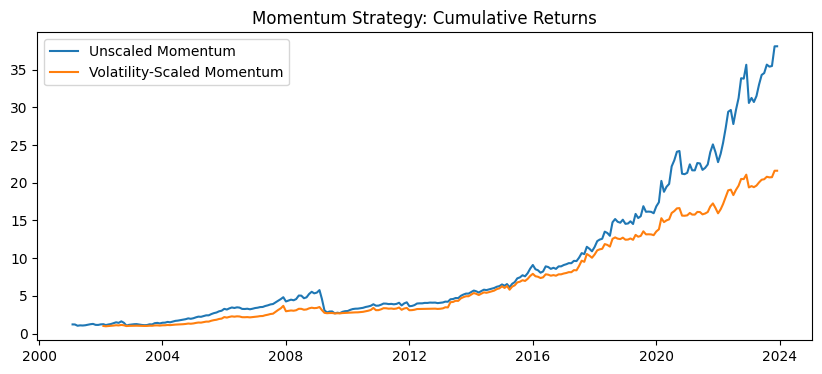

In [10]:
cum_unscaled = cumulative_returns(momentum_returns)
cum_scaled = cumulative_returns(scaled_momentum_portfolio)

plt.figure(figsize=(10, 4))
plt.plot(cum_unscaled, label="Unscaled Momentum")
plt.plot(cum_scaled, label="Volatility-Scaled Momentum")
plt.legend()
plt.title("Momentum Strategy: Cumulative Returns")
plt.show()

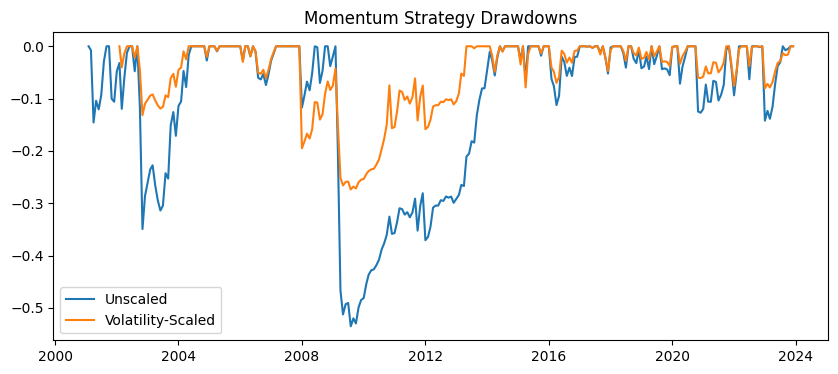

In [11]:
dd_unscaled = drawdown_series(cum_unscaled)
dd_scaled = drawdown_series(cum_scaled)

plt.figure(figsize=(10, 4))
plt.plot(dd_unscaled, label="Unscaled")
plt.plot(dd_scaled, label="Volatility-Scaled")
plt.legend()
plt.title("Momentum Strategy Drawdowns")
plt.show()